# Customizing

## Legend

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

c:\users\iwannab1\anaconda37\envs\fraudit\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\iwannab1\anaconda37\envs\fraudit\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\iwannab1\anaconda37\envs\fraudit\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


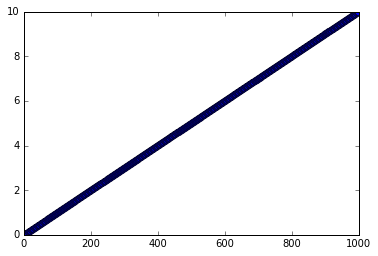

In [5]:
# 균등한 숫자 생성
x = np.linspace(0, 10, 1000)
plt.plot(x, 'o')

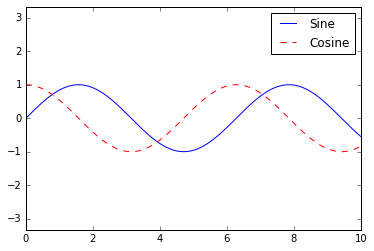

In [6]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

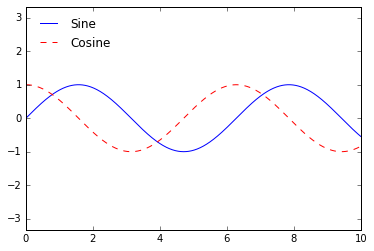

In [7]:
ax.legend(loc='upper left', frameon=False)
fig

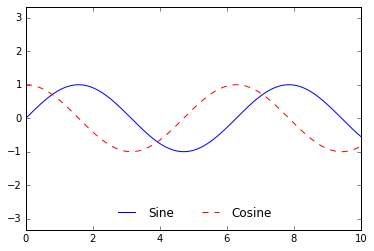

In [8]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

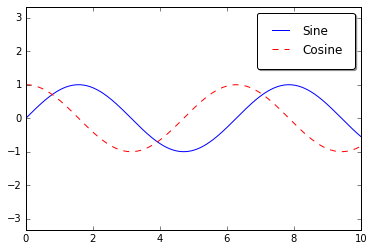

In [9]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

<a href='https://matplotlib.org/3.1.1/api/legend_api.html?highlight=legend#module-matplotlib.legend'>legend document</a>

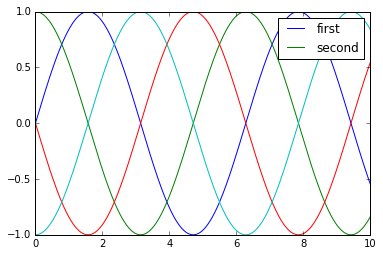

In [10]:

y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# legend 이름 지정
plt.legend(lines[:2], ['first', 'second']);

### 효율적인 정보 전달을 위한 시각화

In [12]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


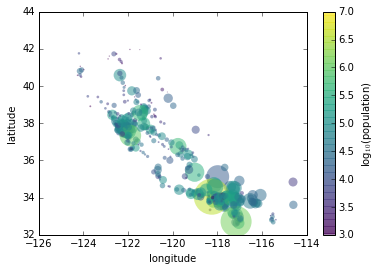

In [16]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# c=np.log10(population), s=area : 인구와 면적에 비례하여 색상 및 크기 조정
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

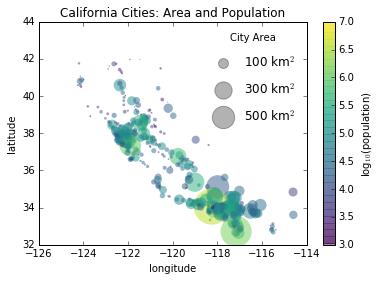

In [29]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# c=np.log10(population), s=area : 인구와 면적에 비례하여 색상 및 크기 조정
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 비어있는 가짜 scatter plot를 생성하여 legend 표시

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

### Multiple Legends

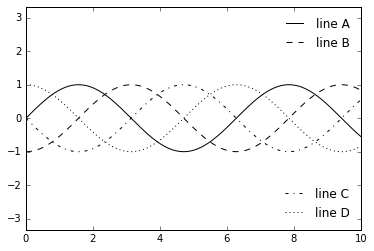

In [36]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 위 legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 아래  legend
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## Ticks

### Major and Minor Ticks

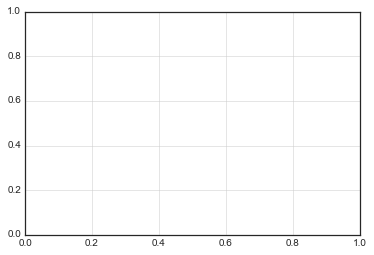

In [56]:
plt.style.use('seaborn-white')
ax = plt.axes()
ax.grid()

In [57]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [58]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### Hiding Ticks or Labels

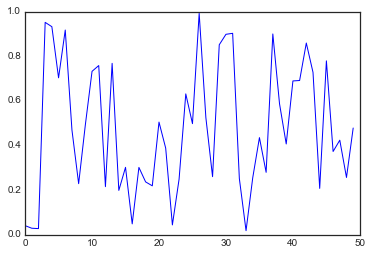

In [59]:
ax = plt.axes()
ax.plot(np.random.rand(50))

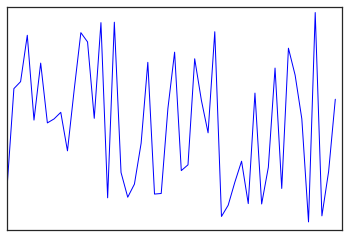

In [61]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

### 출력되는 ticks 조정

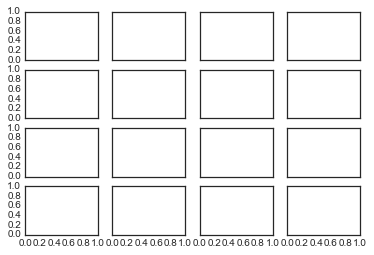

In [62]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

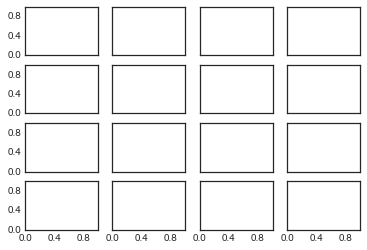

In [63]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### Tick Formats

(0, 9.42477796076938)

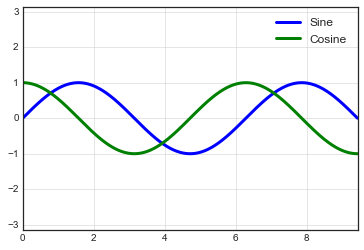

In [64]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

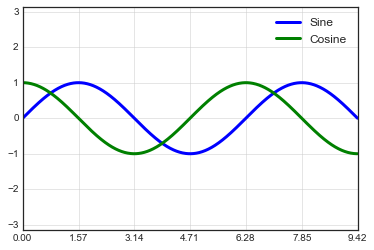

In [65]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

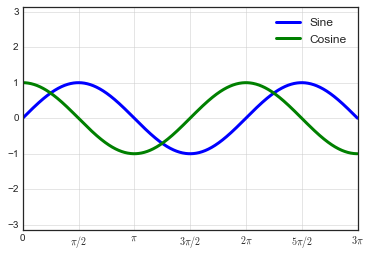

In [66]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

<a href='https://matplotlib.org/3.1.1/api/ticker_api.html'>Formatters / Locators </a>